# Exercise for Graph Ⅲ
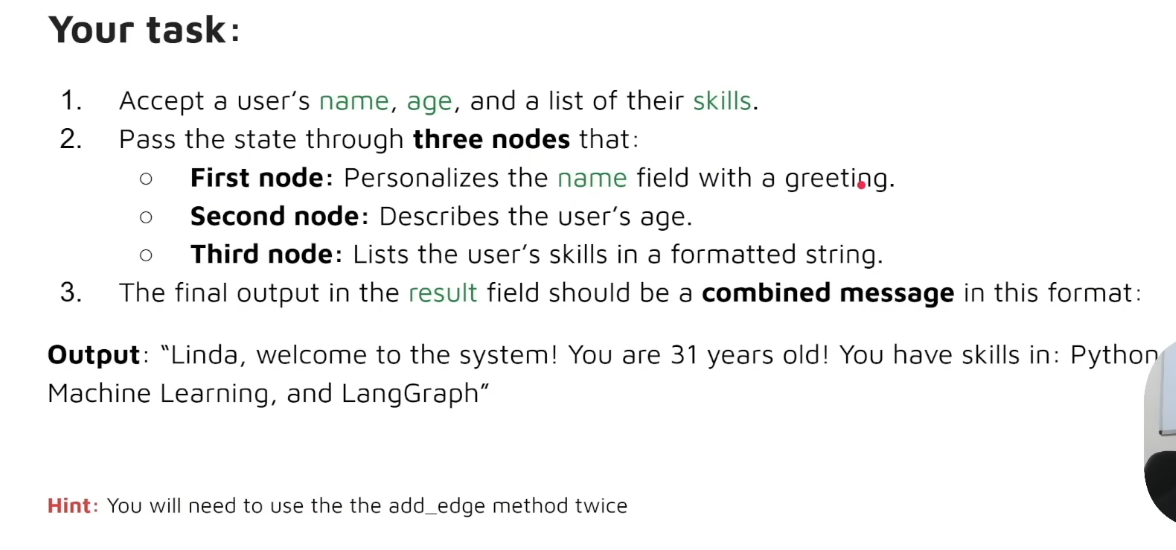

In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph
from dataclasses import dataclass

In [2]:
@dataclass
class AgentState:
    name:str
    age:int
    skills:List[str]
    final:str

In [3]:
def first_node(state:AgentState)->AgentState:
    """初始化欢迎消息节点函数
    
    该函数用于设置用户的初始欢迎信息，将欢迎消息存储在state的final属性中

    Args:
        state (AgentState): 包含用户信息的状态对象，需要有name属性

    Returns:
        AgentState: 更新后的状态对象，其final属性包含欢迎消息
    """
    state.final=f"{state.name},welcome to the system!"
    return state

def second_node(state: AgentState)->AgentState:
    """添加年龄信息节点函数
    
    该函数用于在现有欢迎消息基础上追加用户的年龄信息

    Args:
        state (AgentState): 包含用户信息的状态对象，需要有age和final属性

    Returns:
        AgentState: 更新后的状态对象，其final属性包含追加的年龄信息
    """
    state.final+=f"You are {state.age} years old!"
    return state

def third_node(state: AgentState)->AgentState:
    """添加技能信息节点函数
    
    该函数用于在现有消息基础上追加用户的技能信息，并根据技能数量采用不同的格式化方式

    Args:
        state (AgentState): 包含用户信息的状态对象，需要有skills和final属性
    """
    # 根据技能列表长度格式化技能字符串
    if len(state.skills)==1:
        skills_str=state.skills[0]
    elif len(state.skills)==2:
        skills_str= f"{state.skills[0]} and {state.skills[1]}"
    else:
        skills_str = ", ".join(state.skills[:-1]) + f", and {state.skills[-1]}"
    state.final+=f"You have skills in {skills_str}"
    return state

In [4]:
graph=StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_node("third_node",third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node","second_node")
graph.add_edge("second_node","third_node")
graph.set_finish_point("third_node")

app=graph.compile()

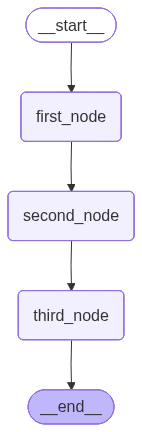

In [5]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
res=app.invoke(AgentState(
        name="Linda",
        age=31,
        skills=["Python", "Machine Learning", "LangGraph"],
        final=""
    ))
print(res)

{'name': 'Linda', 'age': 31, 'skills': ['Python', 'Machine Learning', 'LangGraph'], 'final': 'Linda,welcome to the system!You are 31 years old!You have skills in Python, Machine Learning, and LangGraph'}
